<h2 style="text-align:center;">DETECTING BOT-CONTROLLED ACCOUNTS ON SOCIAL MEDIA USING MACHINE LEARNING TECHNIQUES PART II</h2>

### 1. Import Data Manipulation Libraries

In [1]:
import os 
import re
import json

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action="ignore")

### 2. Define Utility Functions for converting JSON to Pandas DataFrame

In [2]:
def create_dataframe(account_data_list):
    dataframe = pd.DataFrame({})
    
    for account_data in account_data_list:
        user_follower_count = account_data["userFollowerCount"]
        user_following_count = account_data["userFollowingCount"]
        follower_following_ratio = user_follower_count/max(1,user_following_count)

        temp_dataframe = pd.DataFrame([
            {"user_media_count":account_data["userMediaCount"],
            "user_follower_count":account_data["userFollowerCount"],
            "user_following_count":account_data["userFollowingCount"],
            "user_has_highligh_reels":account_data["userHasHighlighReels"],
            "user_has_external_url":account_data["userHasExternalUrl"],
            "user_tags_count":account_data["userTagsCount"],
            "follower_following_ratio":follower_following_ratio,
            "user_biography_length":account_data["userBiographyLength"],
            "username_length":account_data["usernameLength"],
            "username_digit_count":account_data["usernameDigitCount"],
            "media_comment_numbers":account_data["mediaCommentNumbers"],
            "media_comments_are_disabled":account_data["mediaCommentNumbers"],
            "media_has_location_info":account_data["mediaHasLocationInfo"],
            "media_hashtag_numbers":account_data["mediaHashtagNumbers"],
            "media_like_numbers":account_data["mediaLikeNumbers"],
            "mediaUpload_times":account_data["mediaUploadTimes"],
            "automated_behaviour":account_data["automatedBehaviour"]
        }])

        dataframe = pd.concat([dataframe, temp_dataframe], ignore_index=True)

    return dataframe

In [3]:
def import_data(dataset_path):

    with open(dataset_path + "/" + dataset_version + "/automatedAccountData.json") as json_file:
        automated_account_data = json.load(json_file)
    with open(dataset_path + "/" + dataset_version + "/nonautomatedAccountData.json") as json_file:
        nonautomated_account_data = json.load(json_file)

    automated_account_dataframe = create_dataframe(automated_account_data)
    nonautomated_account_dataframe = create_dataframe(nonautomated_account_data)

    merged_dataframe = pd.concat([automated_account_dataframe, nonautomated_account_dataframe], ignore_index=True)

    return merged_dataframe

### 3. Load Datasets 

In [4]:
dataset_path = "/kaggle/input/social-bot-dataset/dataset/instafake-dataset"
dataset_version = "automated-v1.0"

In [5]:
instagram_df = import_data(dataset_path)

### 4. Dataset Preview 

In [6]:
instagram_df.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,media_comment_numbers,media_comments_are_disabled,media_has_location_info,media_hashtag_numbers,media_like_numbers,mediaUpload_times,automated_behaviour
0,97,1612,7108,0,1,36,0.226787,133,12,0,"[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[5, 2, 10, 0, 3, 2, 2, 2, 4, 0, 0, 6, 6, 0, 2,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10, 10, 12, 10, 13, 13, 10, 12, 10, 11, 11, 1...","[100, 78, 112, 78, 77, 111, 97, 95, 63, 83, 42...","[1540847457, 1540744841, 1538410400, 153729214...",1
1,863,3028,912,1,0,77,3.320175,99,11,0,"[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[3, 2, 3, 4, 7, 2, 0, 6, 2, 2, 1, 9, 2, 0, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[8, 11, 14, 17, 12, 10, 13, 14, 14, 11, 10, 11...","[229, 331, 180, 326, 313, 157, 245, 161, 182, ...","[1542664246, 1542569444, 1542564418, 154211928...",1
2,149,5213,1157,1,1,56,4.505618,120,18,0,"[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[12, 16, 37, 11, 3, 4, 2, 4, 5, 1, 1, 2, 3, 3,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[25, 25, 25, 25, 15, 15, 15, 5, 15, 10, 10, 10...","[237, 254, 350, 257, 180, 172, 141, 84, 218, 8...","[1543220394, 1542972220, 1542868998, 154278889...",1
3,33,12423,1763,0,0,2,7.046512,55,13,0,"[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[2, 2, 7, 14, 17, 3, 2, 5, 2, 1, 5, 5, 8, 1, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 14, 14, 0, 0...","[163, 30, 92, 111, 145, 110, 81, 81, 61, 60, 6...","[1543886933, 1543793413, 1543704343, 154344770...",1
4,1000,9496,2412,1,0,91,3.936982,33,8,0,"[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[4, 0, 13, 9, 9, 6, 16, 4, 25, 6, 3, 4, 16, 10...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[4, 1, 2, 3, 3, 0, 0, 1, 0, 2, 1, 2, 3, 1, 1, ...","[61, 222, 437, 829, 681, 440, 920, 256, 1017, ...","[1543939920, 1543699089, 1543187756, 154264414...",1


In [7]:
instagram_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_media_count             1400 non-null   int64  
 1   user_follower_count          1400 non-null   int64  
 2   user_following_count         1400 non-null   int64  
 3   user_has_highligh_reels      1400 non-null   int64  
 4   user_has_external_url        1400 non-null   int64  
 5   user_tags_count              1400 non-null   int64  
 6   follower_following_ratio     1400 non-null   float64
 7   user_biography_length        1400 non-null   int64  
 8   username_length              1400 non-null   int64  
 9   username_digit_count         1400 non-null   int64  
 10  media_comment_numbers        1400 non-null   object 
 11  media_comments_are_disabled  1400 non-null   object 
 12  media_has_location_info      1400 non-null   object 
 13  media_hashtag_numb

In [8]:
instagram_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_media_count,1400.0,172.925714,251.258929,0.000000,21.000000,63.000000,197.500000,1000.0
user_follower_count,1400.0,8498.517857,167468.383100,2.000000,328.500000,666.500000,3272.750000,6255036.0
user_following_count,1400.0,1518.572857,1804.625336,0.000000,368.750000,683.000000,1906.000000,7502.0
user_has_highligh_reels,1400.0,0.480000,0.499778,0.000000,0.000000,0.000000,1.000000,1.0
user_has_external_url,1400.0,0.306429,0.461175,0.000000,0.000000,0.000000,1.000000,1.0
user_tags_count,1400.0,555.050714,17780.656031,0.000000,4.000000,19.000000,57.000000,665233.0
follower_following_ratio,1400.0,32.400666,658.421369,0.048157,0.780443,1.005077,1.866799,20244.0
user_biography_length,1400.0,59.265000,53.916826,0.000000,6.000000,43.500000,113.000000,150.0
username_length,1400.0,11.980714,3.822405,5.000000,9.000000,11.000000,14.000000,30.0
username_digit_count,1400.0,0.267857,0.810295,0.000000,0.000000,0.000000,0.000000,6.0


### 5. Feature Engineering

#### 5.1. Define Utility function

In [9]:
def get_intertime(df):
    """
    Calculate the average time difference between consecutive tweets.

    Parameters:
    - df (pandas.DataFrame): A DataFrame containing tweet information.
    
    Returns:
    - float: The average time difference between consecutive tweets in seconds.
    """

    tweet_timestamps = df["mediaUpload_times"]

    tweet_timestamps.sort()
    tts_diff = np.diff(np.array(tweet_timestamps))
    
    return sum(tts_diff) / (len(tts_diff) if len(tts_diff) != 0 else 1)

#### 5.2. Engineer Columns

In [10]:
columns = [
    "avg_comment_numbers", "avg_hashtag_numbers", "avg_like_numbers",
    "avg_location_info", "avg_comments_disabled", "intertime"
]

In [11]:
engineered_df = pd.DataFrame(columns=columns)

# Iterate through rows
for index, row in instagram_df.iterrows():
    # Calculate averages
    
    avg_comment_numbers = sum(row['media_comment_numbers']) / len(row['media_comment_numbers']) if len(row['media_comment_numbers']) > 0 else 0
    avg_hashtag_numbers = sum(row['media_hashtag_numbers']) / len(row['media_hashtag_numbers']) if len(row['media_hashtag_numbers']) > 0 else 0
    avg_like_numbers = sum(row['media_like_numbers']) / len(row['media_like_numbers']) if len(row['media_like_numbers']) > 0 else 0
    avg_location_info = sum(row['media_has_location_info']) / len(row['media_has_location_info']) if len(row['media_has_location_info']) > 0 else 0
    avg_comments_disabled = sum(row['media_comments_are_disabled']) / len(row['media_comments_are_disabled']) if len(row['media_comments_are_disabled']) > 0 else 0

    
    intertime = get_intertime(row)
    
    # Create a list with user features
    temp_df = [avg_comment_numbers, avg_comments_disabled, avg_location_info,
                    avg_hashtag_numbers, avg_like_numbers, intertime]
    
     # Append features to DataFrame
    engineered_df = pd.concat([engineered_df, pd.DataFrame([temp_df], columns=columns)])


In [12]:
engineered_df = engineered_df.reset_index().drop(columns=['index'])

engineered_df.head()

,avg_comment_numbers,avg_hashtag_numbers,avg_like_numbers,avg_location_info,avg_comments_disabled,intertime
0,2.453608,2.453608,0.979381,13.886598,55.041237,9.729335e+05
1,1.701043,1.701043,0.505214,4.115875,61.212051,1.522966e+05
2,2.026846,2.026846,0.248322,10.302013,70.939597,5.013704e+05
3,4.787879,4.787879,0.000000,2.121212,65.181818,1.033802e+06
4,3.585000,3.585000,0.269000,4.008000,160.267000,1.566768e+05


#### 5.3. Add engineered features to base features

In [13]:
base_columns = [
    'user_media_count', 'user_follower_count', 'user_following_count', 'user_has_highligh_reels', 
    'user_has_external_url', 'user_tags_count', 'follower_following_ratio', 'user_biography_length', 
    'username_length', 'username_digit_count', 'automated_behaviour'
]

base_df = instagram_df[base_columns]

In [14]:
instagram_df =  pd.concat([base_df, engineered_df], axis=1)

instagram_df.head()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,automated_behaviour,avg_comment_numbers,avg_hashtag_numbers,avg_like_numbers,avg_location_info,avg_comments_disabled,intertime
0,97,1612,7108,0,1,36,0.226787,133,12,0,1,2.453608,2.453608,0.979381,13.886598,55.041237,9.729335e+05
1,863,3028,912,1,0,77,3.320175,99,11,0,1,1.701043,1.701043,0.505214,4.115875,61.212051,1.522966e+05
2,149,5213,1157,1,1,56,4.505618,120,18,0,1,2.026846,2.026846,0.248322,10.302013,70.939597,5.013704e+05
3,33,12423,1763,0,0,2,7.046512,55,13,0,1,4.787879,4.787879,0.000000,2.121212,65.181818,1.033802e+06
4,1000,9496,2412,1,0,91,3.936982,33,8,0,1,3.585000,3.585000,0.269000,4.008000,160.267000,1.566768e+05


### 6. Data Visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 6.1. Visualize the proportion of data class

In [16]:
labels_count = instagram_df['automated_behaviour'].value_counts()

labels_count

automated_behaviour
1    700
0    700
Name: count, dtype: int64

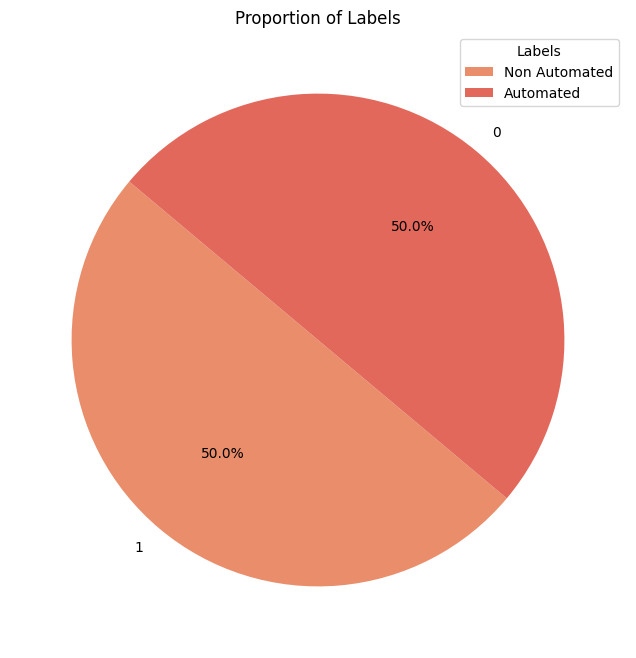

In [17]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
sns.set_palette("flare")
plt.pie(labels_count, labels=labels_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Labels')
plt.legend(labels=['Non Automated', 'Automated'], title='Labels', loc='upper right')
plt.show()

### 7. Data Preprocessing

#### 7.1. Separate features from target

In [18]:
features_df = instagram_df.drop(columns=['automated_behaviour'])

target = instagram_df['automated_behaviour']

#### 7.2. Numeric columns scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Features before scaling
features_df.describe()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,avg_comment_numbers,avg_hashtag_numbers,avg_like_numbers,avg_location_info,avg_comments_disabled,intertime
count,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03
mean,172.925714,8.498518e+03,1518.572857,0.480000,0.306429,555.050714,32.400666,59.265000,11.980714,0.267857,5.225851,5.225851,0.364830,5.327608,296.547951,2.274509e+06
std,251.258929,1.674684e+05,1804.625336,0.499778,0.461175,17780.656031,658.421369,53.916826,3.822405,0.810295,17.785649,17.785649,0.314056,7.573074,4619.407749,6.327526e+06
min,0.000000,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.048157,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,21.000000,3.285000e+02,368.750000,0.000000,0.000000,4.000000,0.780443,6.000000,9.000000,0.000000,1.000000,1.000000,0.055180,0.274877,40.781818,2.164296e+05
50%,63.000000,6.665000e+02,683.000000,0.000000,0.000000,19.000000,1.005077,43.500000,11.000000,0.000000,2.045465,2.045465,0.319091,1.563855,77.059360,7.707493e+05
75%,197.500000,3.272750e+03,1906.000000,1.000000,1.000000,57.000000,1.866799,113.000000,14.000000,0.000000,4.283654,4.283654,0.600000,7.387938,168.828747,2.398874e+06
max,1000.000000,6.255036e+06,7502.000000,1.000000,1.000000,665233.000000,20244.000000,150.000000,30.000000,6.000000,473.959821,473.959821,1.000000,30.000000,172615.747024,1.366961e+08


In [21]:
# Select numeric columns
num_cols = features_df.select_dtypes(include=np.number).columns.tolist()

In [22]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame()

scaled_output = scaler.fit_transform(features_df[num_cols])

scaled_df[num_cols] = scaled_output

In [23]:
# Features after scaling
scaled_df.describe()

,user_media_count,user_follower_count,user_following_count,user_has_highligh_reels,user_has_external_url,user_tags_count,follower_following_ratio,user_biography_length,username_length,username_digit_count,avg_comment_numbers,avg_hashtag_numbers,avg_like_numbers,avg_location_info,avg_comments_disabled,intertime
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.172926,0.001358,0.202422,0.480000,0.306429,0.000834,0.001598,0.395100,0.279229,0.044643,0.011026,0.011026,0.364830,0.177587,0.001718,0.016639
std,0.251259,0.026773,0.240553,0.499778,0.461175,0.026728,0.032524,0.359446,0.152896,0.135049,0.037526,0.037526,0.314056,0.252436,0.026761,0.046289
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.021000,0.000052,0.049154,0.000000,0.000000,0.000006,0.000036,0.040000,0.160000,0.000000,0.002110,0.002110,0.055180,0.009163,0.000236,0.001583
50%,0.063000,0.000106,0.091042,0.000000,0.000000,0.000029,0.000047,0.290000,0.240000,0.000000,0.004316,0.004316,0.319091,0.052128,0.000446,0.005638
75%,0.197500,0.000523,0.254066,1.000000,1.000000,0.000086,0.000090,0.753333,0.360000,0.000000,0.009038,0.009038,0.600000,0.246265,0.000978,0.017549
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 7.3. Split Data into Training and Test Set

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = scaled_df.copy()
y = instagram_df['automated_behaviour']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [27]:
print(f"The shape of the training data is {X_train.shape}")
print(f"The shape of the test data is {X_test.shape}")

The shape of the training data is (1120, 16)
The shape of the test data is (280, 16)


### 8. Model Building

In [28]:
from sklearn.ensemble import RandomForestClassifier

#### 8.1 Build Random Forest Classifier model

In [29]:
rf_classifier = RandomForestClassifier(random_state=42)

In [30]:
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

#### 8.2 Evaluate Classifier

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       140
           1       0.96      0.93      0.94       140

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



In [34]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9429
Precision: 0.9559
Recall: 0.9286
F1-Score: 0.9420


#### 8.3 Confusion Matrix Plot

In [35]:
cm = confusion_matrix(y_test, y_pred)

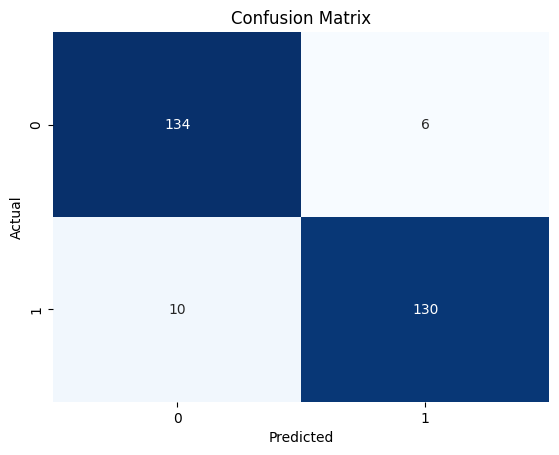

In [36]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### 8.4. ROC-AUC Plot

In [37]:
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

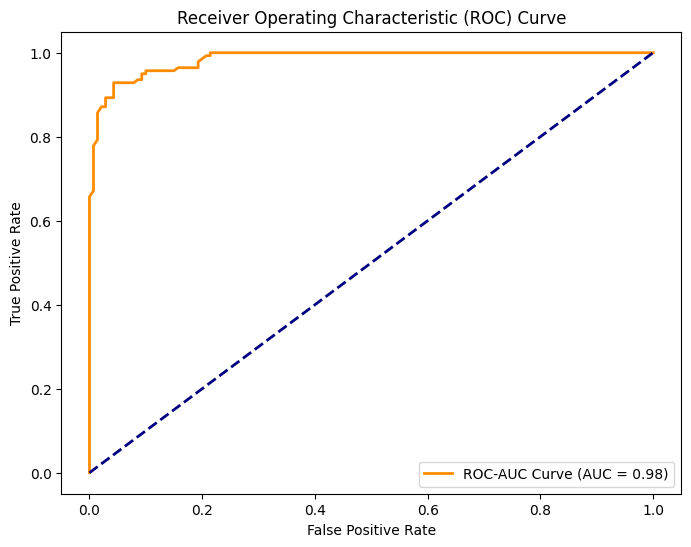

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-AUC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### 8.5. Model Interpretation: Feature Importance

In [39]:
feature_importance = rf_classifier.feature_importances_
feature_names = X_train.columns

In [40]:
# Get indices of top 10 features
top_indices = feature_importance.argsort()[-10:][::-1]

# Extract top 10 feature names and importance values
top_feature_names = feature_names[top_indices]
top_feature_importance = feature_importance[top_indices]

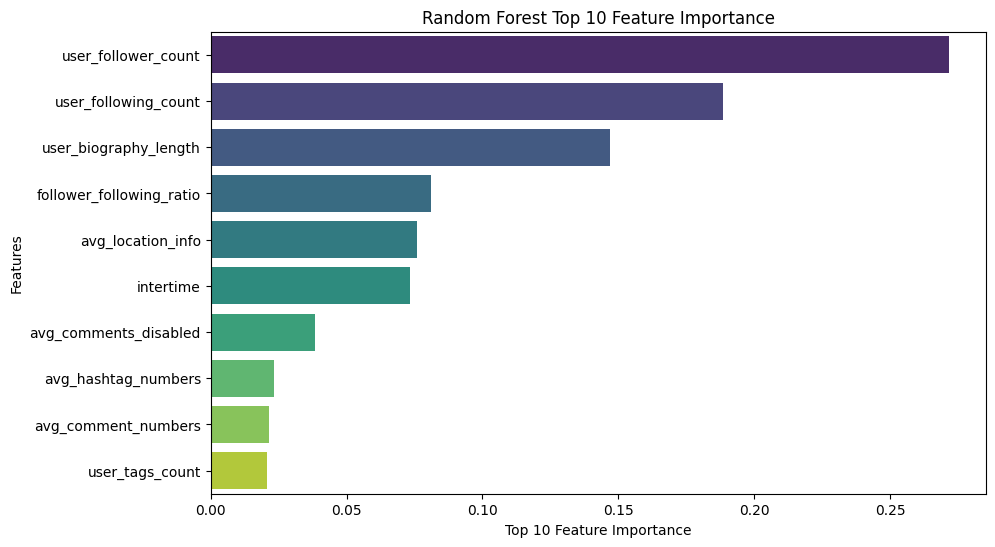

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feature_importance, y=top_feature_names, orient='h', palette='viridis')
plt.xlabel('Top 10 Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Top 10 Feature Importance')
plt.show()